# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&units=Metric&appid=" + weather_api_key
#url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}"

params = {
    "api_keys": weather_api_key
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "&q=" + city
    city_url = url + "&q=" + cities[i]
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url, params=params).json()
        #city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
       
   
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | cam ranh
Processing Record 4 of Set 1 | kuraymah
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | gaspe
Processing Record 7 of Set 1 | ghazni
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | pagar alam
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | kiuruvesi
Processing Record 16 of Set 1 | achacachi
Processing Record 17 of Set 1 | kanniyakumari
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | acapulco de juarez
Processing Record 21 of Set 1 | zhangatas
Processing Record 22 of 

Processing Record 40 of Set 4 | san ignacio
Processing Record 41 of Set 4 | sechura
Processing Record 42 of Set 4 | adam
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | ghat
Processing Record 45 of Set 4 | pijijiapan
Processing Record 46 of Set 4 | ola
Processing Record 47 of Set 4 | san antonio de pale
Processing Record 48 of Set 4 | choibalsan
Processing Record 49 of Set 4 | colares
Processing Record 0 of Set 5 | zlatitsa
Processing Record 1 of Set 5 | straseni
Processing Record 2 of Set 5 | pritzwalk
Processing Record 3 of Set 5 | palu
Processing Record 4 of Set 5 | praia da vitoria
Processing Record 5 of Set 5 | acu
Processing Record 6 of Set 5 | el granada
Processing Record 7 of Set 5 | utrik
Processing Record 8 of Set 5 | polyarnyy
Processing Record 9 of Set 5 | igarka
Processing Record 10 of Set 5 | bardai
Processing Record 11 of Set 5 | rongelap
Processing Record 12 of Set 5 | anadyr
Processing Record 13 of Set 5 | hamilton
Processing Record 14 of Set 5

Processing Record 31 of Set 8 | port augusta
Processing Record 32 of Set 8 | nikolayevsk-on-amure
Processing Record 33 of Set 8 | arraial do cabo
Processing Record 34 of Set 8 | hasaki
Processing Record 35 of Set 8 | tanki leendert
City not found. Skipping...
Processing Record 36 of Set 8 | prince rupert
Processing Record 37 of Set 8 | queenstown
Processing Record 38 of Set 8 | goderich
Processing Record 39 of Set 8 | port elizabeth
Processing Record 40 of Set 8 | harper
Processing Record 41 of Set 8 | villamontes
Processing Record 42 of Set 8 | whangarei
Processing Record 43 of Set 8 | pangody
Processing Record 44 of Set 8 | sirsa
Processing Record 45 of Set 8 | cable beach
City not found. Skipping...
Processing Record 46 of Set 8 | liepaja
Processing Record 47 of Set 8 | labrador city
Processing Record 48 of Set 8 | natchitoches
Processing Record 49 of Set 8 | bandarbeyla
Processing Record 0 of Set 9 | talcahuano
Processing Record 1 of Set 9 | kamina
Processing Record 2 of Set 9 | zh

Processing Record 21 of Set 12 | markovo
Processing Record 22 of Set 12 | oriximina
Processing Record 23 of Set 12 | presidente epitacio
Processing Record 24 of Set 12 | thurso
Processing Record 25 of Set 12 | zhalantun
Processing Record 26 of Set 12 | wotje
Processing Record 27 of Set 12 | mili
Processing Record 28 of Set 12 | puerto armuelles
Processing Record 29 of Set 12 | taroa
Processing Record 30 of Set 12 | saddiqabad
Processing Record 31 of Set 12 | la ronge
Processing Record 32 of Set 12 | barcelos
Processing Record 33 of Set 12 | yamazakicho-nakabirose
Processing Record 34 of Set 12 | arno
Processing Record 35 of Set 12 | chernyshevskiy
Processing Record 36 of Set 12 | liberal
Processing Record 37 of Set 12 | irymple
Processing Record 38 of Set 12 | minas de marcona
Processing Record 39 of Set 12 | nova vicosa
Processing Record 40 of Set 12 | bamboo flat
Processing Record 41 of Set 12 | lame
Processing Record 42 of Set 12 | ghadamis
Processing Record 43 of Set 12 | we
City n

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
len(city_data_df)

590

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.80,87,75,13.48,PN,1684882494
1,thompson,55.7435,-97.8558,13.09,38,40,4.12,CA,1684882278
2,cam ranh,11.9214,109.1591,26.98,78,0,0.00,VN,1684882495
3,kuraymah,18.5500,31.8500,32.64,11,6,5.13,SD,1684882495
4,edinburgh of the seven seas,-37.0676,-12.3116,13.60,67,71,11.89,SH,1684882495


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.80,87,75,13.48,PN,1684882494
1,thompson,55.7435,-97.8558,13.09,38,40,4.12,CA,1684882278
2,cam ranh,11.9214,109.1591,26.98,78,0,0.00,VN,1684882495
3,kuraymah,18.5500,31.8500,32.64,11,6,5.13,SD,1684882495
4,edinburgh of the seven seas,-37.0676,-12.3116,13.60,67,71,11.89,SH,1684882495


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

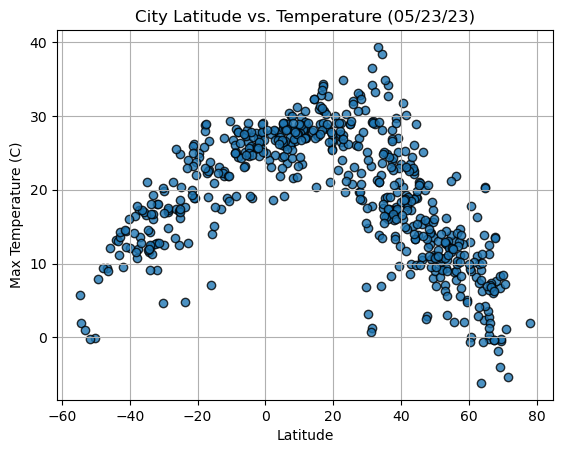

In [47]:
# Build scatter plot for latitude vs. temperature
#plt.scatter(Lat, Max Temp, edgecolor="black", linewidth=2, marker="o"), alpha==0.8, label=="Cities"

x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.grid(True)
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

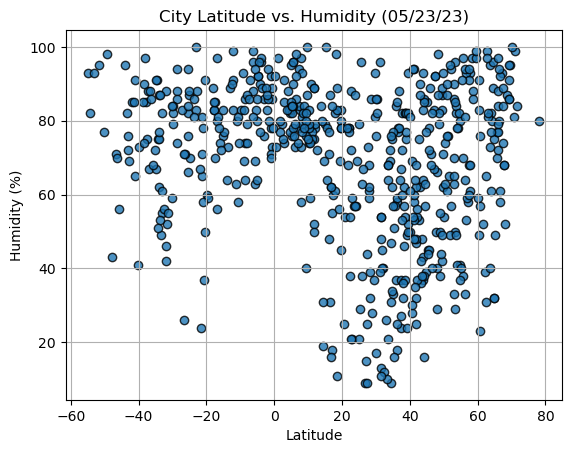

In [48]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.grid(True)
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

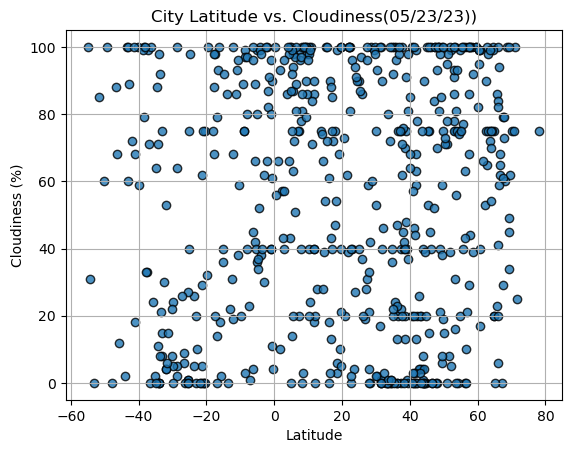

In [49]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness(%s))" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

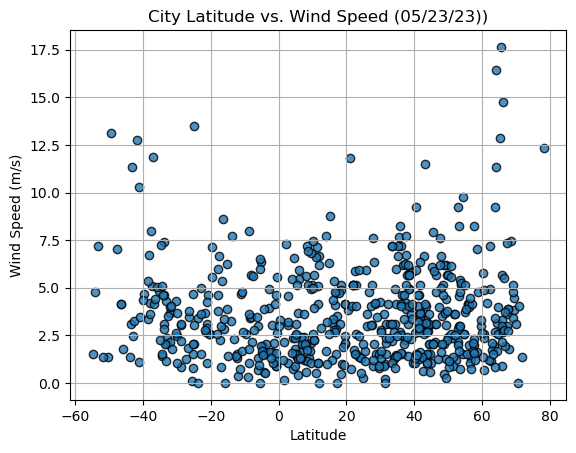

In [50]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%s))" % time.strftime("%x"))
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="r")
    plt.xlabel("Latitude")
    plt.grid(True)
    #plt.ylabel("")
    print(f"The p-value is: {pvalue}")
    print(f"The r-value is: {rvalue}")
    #plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,13.09,38,40,4.12,CA,1684882278
2,cam ranh,11.9214,109.1591,26.98,78,0,0.00,VN,1684882495
3,kuraymah,18.5500,31.8500,32.64,11,6,5.13,SD,1684882495
5,gaspe,48.8334,-64.4819,14.12,38,40,2.06,CA,1684882495
6,ghazni,33.5536,68.4269,13.91,64,80,2.21,AF,1684882495


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.80,87,75,13.48,PN,1684882494
4,edinburgh of the seven seas,-37.0676,-12.3116,13.60,67,71,11.89,SH,1684882495
8,puerto ayora,-0.7393,-90.3518,28.98,89,90,0.89,EC,1684882287
10,namibe,-15.1961,12.1522,20.97,76,36,3.88,AO,1684882495
11,pagar alam,-4.0167,103.2667,18.85,96,38,1.53,ID,1684882495


###  Temperature vs. Latitude Linear Regression Plot

The p-value is: 6.829348185565549e-91
The r-value is: -0.788459368547469


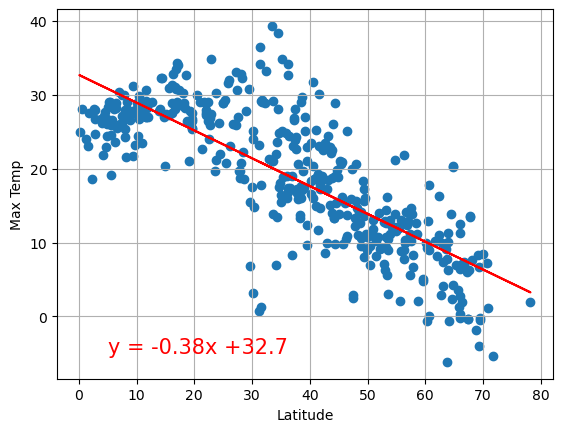

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, "Max Temp", (5, -5))

The p-value is: 6.143284703028533e-44
The r-value is: 0.8312890305398762


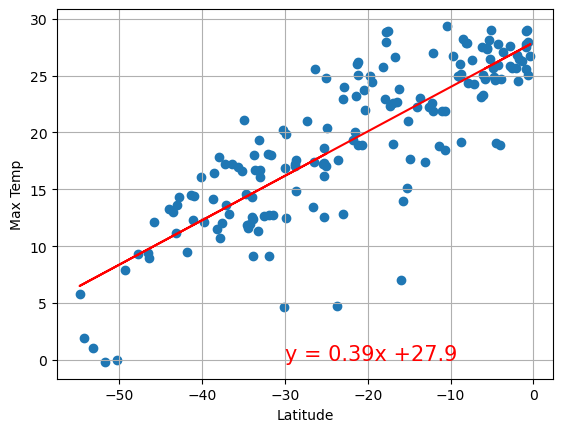

In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, "Max Temp", (-30, 0))

**Discussion about the linear relationship:** The data plots for temperature/latitude in the northern hemisphere shows a negative linear relationship, whereas the temperature/latitude for the southern hemisphere shows a positive linear relationship. 

### Humidity vs. Latitude Linear Regression Plot

The p-value is: 0.7039390096459465
The r-value is: -0.018529897322272903


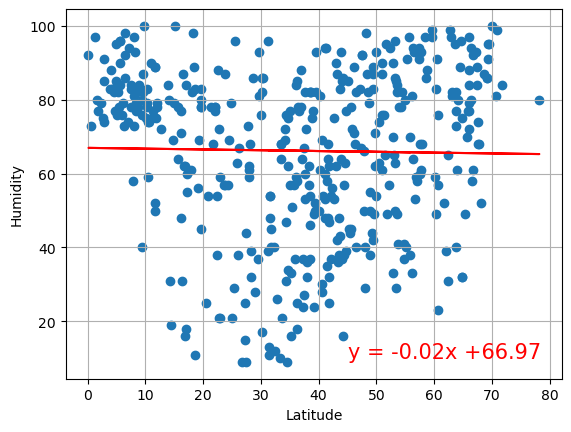

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, "Humidity", (45, 10))

The p-value is: 0.021073781181138857
The r-value is: 0.17840030710558916


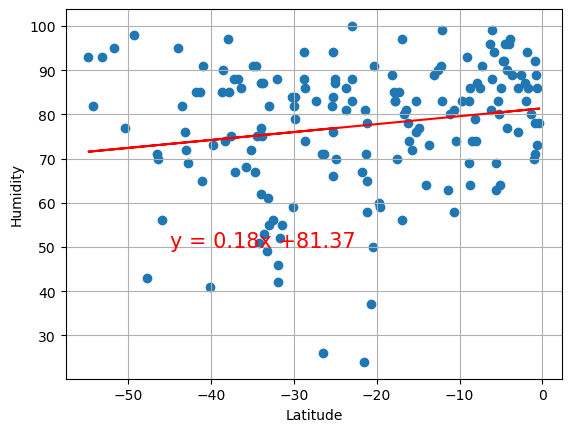

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, "Humidity", (-45, 50))

**Discussion about the linear relationship:** Both the data plots for humidity/latitude in the northern hemisphere and southern hemisphere shows a positive linear relationship; however, the southern hemisphere has a greater consistency. 

### Cloudiness vs. Latitude Linear Regression Plot

The p-value is: 0.606044541714394
The r-value is: -0.025145987549328817


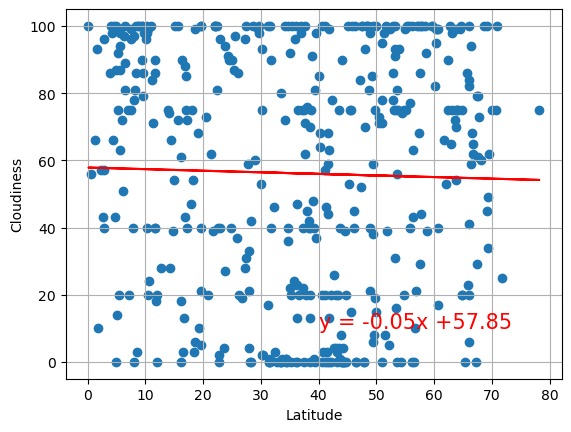

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 10))

The p-value is: 0.11261557280268854
The r-value is: 0.12322776312052927


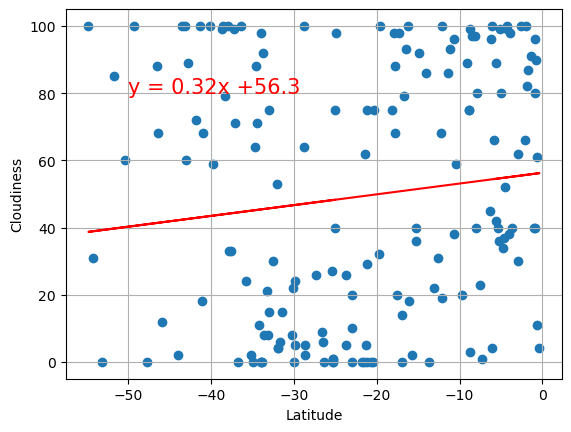

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 80))

**Discussion about the linear relationship:** Both the data plots for cloudiness/latitude in the northern hemisphere and southern hemisphere shows a ####linear relationship####. 

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.005521091151274467
The r-value is: 0.13470563395158502


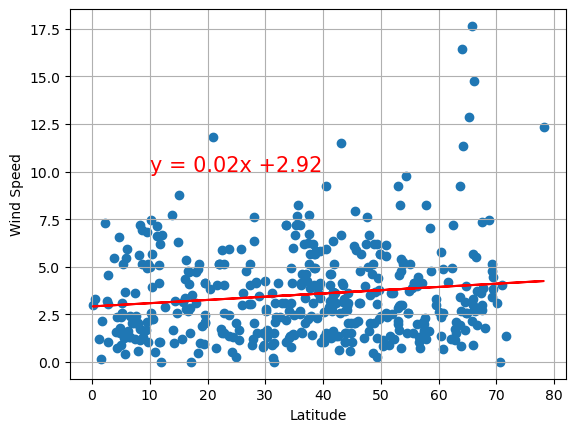

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 10))

The p-value is: 0.00018348854411905452
The r-value is: -0.28556001877249215


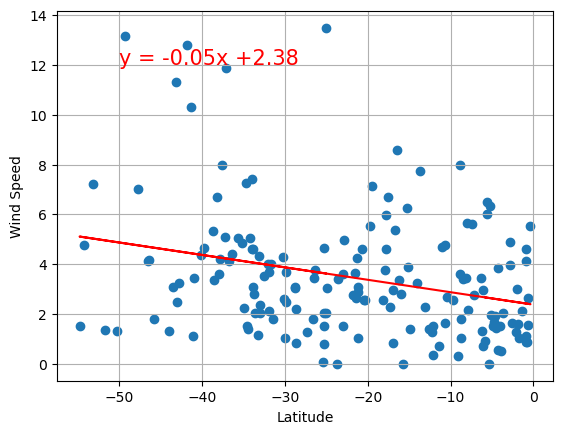

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** The data plots for wind speed/latitude in the northern hemisphere shows a negative linear relationship, whereas the wind speed/latitude for the southern hemisphere shows a positive linear relationship. 